# Direct Forcing Method
---
### Author: Marin Lauber

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import NSsolver as ns
try:
    plt.style.use("jupyter")
except OSError:
    print("Delaut syle in use")

In [42]:
def body(d, t=2):
    return np.where(abs(d)<=t//2, 0, 1)


def update(d, u0, V, dx, dt=1, rho=1, Nsteps=1):
    
    u_n = u0
    delta = body(d)
    
    for i in range(Nsteps):
        
        # first step
        u_star = u_n + delta*dt*ns.r(u_n) + (1-delta)*V

        sigma = ns.div(u_star, dx)

        p = ns.solve_pressure(np.ones_like(sigma), sigma, dx)

        u_n = u_star - dt/rho*(ns.grad(p, dx))
    
    return u_star, sigma, p, u_n

In [43]:
N = 32
x, dx = np.linspace(-1, 1, N, retstep=True)
xs = x + 0.5*dx # scalar cell-centred values
X = np.random.rand()-0.5
V = 1
u0 = np.zeros_like(x)
dt = 1.
d = (x-X)/dx

us, sigma, p, u_n = update(d, u0, V, dx, dt)
print("Interface at X: %.2f" % X)
print(r"L inf: %.3e" % np.max(np.abs(u_n -  V)))

Interface at X: -0.24
L inf: 9.375e-01


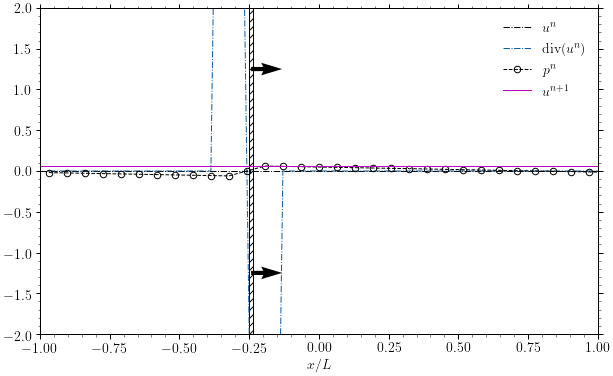

In [44]:
ns.draw_results(x, xs, X, u0, u_n, p, sigma)

In [45]:
N = 32
x, dx = np.linspace(-1, 1, N, retstep=True)
xs = x + 0.5*dx # scalar cell-centred values
X = np.random.rand()-0.5
V = 1
u0 = np.zeros_like(x)
d = (x-X)/dx

us, sigma, p, u_n = update(d, u0, V, dx, dt, Nsteps=16)
print("Interface at X: %.2f" % X)
print(r"L inf: %.3e" % np.max(np.abs(u_n -  V)))

Interface at X: -0.31
L inf: 1.752e-10


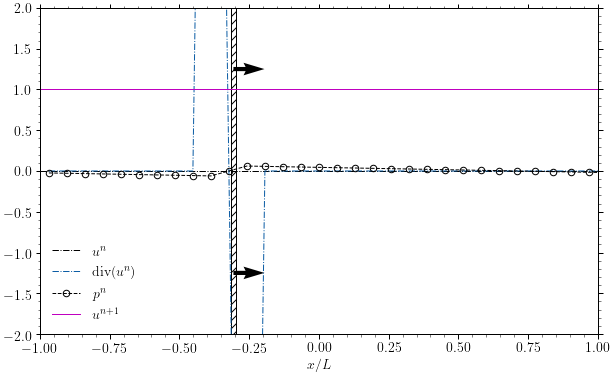

In [46]:
ns.draw_results(x, xs, X, u0, u_n, p, sigma)